# Linear Discriminant Analysis



# Introduction

**WIP**

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. But can also be use as classifier. LDA is supervised algorithm (requires labeled data). The terms Fisher's linear discriminant, LDA and Quadratic Linear Discriminant QDA are often used interchangeably, but there are differences (See  [this](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [this](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis) for better disambiguation):

* QDA and LDA are classifier technique. QDA is more general than LDA. The main assumptions are:    

    * The data are normally distributed. Multivariate Gaussians ($ N( x|  \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{\Sigma}} \exp{\left[\frac{1}{2}( x-  \mu)\Sigma^{-1}( x-  \mu)^t\right]}$) are used to score a new unlabeled data (Both QDA and LDA).   
        
        - LDA assume all classes follows the same distribution ( **homosdacity** ), So all covariance matrix are identical.  

        - LDA assumes no multicollinearity between features. **Multicollinearity** can degraded prediction performance   
    * The observations are independent: features are assumed to be randomly sampled (Both QDA and LDA).    


LDA has been empirical verified to be relatively robust to slight violations of these assumptions. However, LDA is quite sensitive to outliers and the size of the smallest group must be larger (NICE to HAVE) than the number of predictor variables

* Fishers LDA is dimension reduction technique.  It does not make assumption such as normality.   

In this notebook we mainly will be talking about Fishers LDA and later will discuss about QDA and LDA as predictors. We normally use the word LDA to refers to Fishers LDA. For simplicity, the practical aspect of Fishers LDA will be explained utilzing a 2 class problem

## What is LDA

In the figure below an labeled dataset contained 2 classes are shown. LDA reduces the dimension of the data by defining a new set of axes ($y$) with lower dimension where the 2 classes are still well separated.

<img src="images/lda_axes_0.png" width="700"/>


###  Small discussion about how LDA works (Can be skipped)

The of goal of (LDA) is to find best new set of axis that maximizes the distance between the means of the classes and also minimize overlap between the projected classes (confusion region). 

The figures below describe LDA being applied to a bidimensional dataset containing 2 classes. The dataset is a set of $n$ d-dimensional samples $X = \{x_1, x_2, ..., x_n\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,2$ where $x_i^{(k)}$ is a vector of dimension $d$.

In the figures can be seen the new proposed set of axes. The left figure, only the distance between the classes were maximized. As a end result there is overlapping region that can noticed in the histogram. The right figure is the LDA's results when not only the distance betwen the classes are maximized but also the overlapping region is minimized

TODO: Try to find a better images or add extras axes in the figure

<img src="images/lda_0.png" width="700"/>

In order to do that, Fisher proposed to maximize the ratio "scattter between classes/scatter within classes" that is expressed by the Cost function:

$
J(w) = \frac{w^{\mathsf{t}}S_{b} w}{ w^{\mathsf{t}}S_{w}  w}
$

where:

* $S_{b}=\sum_1^2( m_2 −  m)( m_2 −  m)^t$ :  between-class covariance/satter matrix. (Can be understood as measure of between class spread)
    
* $S_{w} =  S_1 + S_2$ : within-class covariance/scatter matrices. (Can be understood as measure of within class spread or the sum of the covaraince matrix) 

$ m_1$ and $ m_2$ are the mean of each class. $S_1$ and $S_2$ are the covariance matrix of each class. 

$
S_k = \sum_{i\in X^{(k)}} ( x_i^{(k)} -  m_k) ( x_i^{(k)} - m_k)^t  
$

The total scatter is given by the covariance matrix and should be *conserved* in the new set of axes:

$
S_t = \sum_{j=1}^{n}(x_j - m)(x_j - m)^t \equiv \sum_{k=1}^2 \sum_{i=1}^{n_k}(x_i^{(k)} - m)(x_i^{(k)} - m)^t = S_W + S_B
$

$
n = \sum_{k=1}^2 n_k
$

Can be proved in  [here](refs/ea71fbef3b55b69e142897fadf43b3269463.pdf) and [here](refs/Dimensionality2.pdf) that maximize $J( w)$ is equivalent to find the solution of the eigenvalue problem for the matrix:

$
A =  S_{w}^{-1} S_b
$

$
A{v} =  \lambda {v}
$

where:
* $v$ is the eigenvector and define the new sets of axes
* $\lambda$ is the eigenvalue


### Principal Component Analysis vs. Linear Discriminant Analysis

"
Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.
"

<img src="images/lda_1.png" width="700"/>


### Summarizing the LDA approach in 5 steps


1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices 
    * between-class: measure of dispersion between groups or classes
    * within-class scatter matrix: measure of dispersion in the class or group
3. Compute the eigenvectors $(\pmb e_1, \pmb e_2, ..., \pmb e_d)$ and corresponding eigenvalues $(\lambda_1, \lambda_2,..., \lambda_d)$ for the scatter matrices.
4. Sort the eigenvectors by eigenvalues an keep the k eigenvectors with the k-largest eigenvalues
5. Use the eigenvector matrix to transform the samples onto the new subspace. $Y = X*W$
    * $Y$ is nxk matrix
    * $X$ is nxd dimensional matrix. The input data
    * $W$ is dxk dimensional scatter matrix


### LDA or QDA as predictor


The assumption of LDA and Quadradict discriminant analsys is that each class can be modelled by multivariate gaussian.

$ 
N( x|  \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2}\sqrt{\Sigma_k}} \exp{\left[\frac{1}{2}( x-  \mu_k)\Sigma_k^{-1}( x-  \mu_k)^t\right]}
$

The parameters of the Gaussian of eac classe can be estimated by using the mean and covariance of each group $X^(k)$.

for QDA
$
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$ or for LDA $
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2(x_1) & 0 \\
 0 &  \sigma^2(x_2)
\end{bmatrix}
$.

where the index $i$ denotes the dimension of $x$ and $x \in X^{(k)}$. The figure bellow ilustrate the procedure of label a new data point $x_{new}$. 

<img src="images/lda_predictor.png" width="400"/>

$x_{new}$ will be labeled comparing the probabilities $N( x_{new}|  \mu_k, \Sigma_k)$:

* 1 if $N( x_{new}|  \mu_1, \Sigma_1) > N( x_{new}|  \mu_2, \Sigma_2) $
* 2 otherwise


In [41]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

,label,x,y
0,1,-0.092040,4.709057
1,1,1.974166,3.841060
2,1,1.844352,4.467505
3,1,-2.555581,3.343549
4,1,-0.598959,3.541881


,label,x,y
220,2,6.574923,0.430610
221,2,8.519331,-0.012836
222,2,3.996991,-1.121867
223,2,6.721137,-0.264398
224,2,4.116927,0.593576


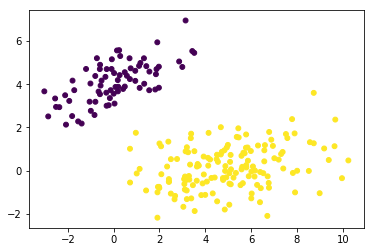

In [87]:
### Setup
# set random seed
rand.seed(2018)

# 2 clusters
# not that both covariance matrices are diagonal
mu1 = [0.0, 4.0]
Sigma1 = [ [2.0, 1.0], [1.0, 1.0] ]

mu2 = [5.0, 0.0]
Sigma2 = [ [4.0, 0.50], [0.50, 1.0] ]

# generate samples
N1 = 75
N2 = 150
x1, y1 = np.random.multivariate_normal(mu1, Sigma1, N1).T
x2, y2 = np.random.multivariate_normal(mu2, Sigma2, N2).T

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))
labels = ([1] * N1) + ([2] * N2)

data = {'x': xs, 'y': ys, 'label': labels}
df = pd.DataFrame(data=data)

# inspect the data
df.head()
df.tail()

fig = plt.figure()
plt.scatter(data['x'], data['y'], 24, c=data['label'])

*TODO* <font color='red'>Move data generation to another notebook later</font>

does need to be here

In [69]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=[], ax=None):
    ax = ax or plt.gca()
    
    if len(label) > 0:
        labels = label
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ws = [value for g in gmm for (param, value) in g.items() if param == 'w']
    w_factor = 0.2 /np.max(ws)
    for param in gmm:
        pos = param['mu']
        covar = param['Covar']
        w = param['w']

        draw_ellipse(pos, covar, alpha=w * w_factor)

Text(4.2,3.2,'new point')

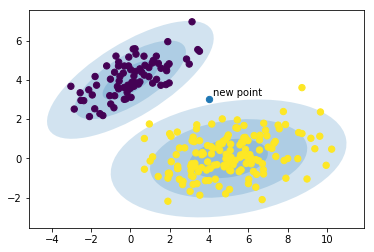

In [88]:
labels = df.label
X = df[['x','y']].values

initial_guess = [{ 'mu': np.asarray(mu1),
          'Covar': np.asarray(Sigma1),
          'w': 0.5 },  
          {'mu': np.asarray(mu2),
          'Covar': np.asarray(Sigma2),
          'w': 0.5}]

#plot_gmm(initial_guess, X,label=labels)

ax = plt.gca()
plot_gmm(initial_guess, X, label=labels, ax=ax)

ax.scatter(4, 3, s=40, cmap='viridis', zorder=2)
ax.text(4.2, 3.2, 'new point')

In [23]:
df.to_csv('bi_dimensional_n_bi_modal_data.csv', index=False)

## Read the data

For verification of the formulas cited in the section above, we are going to compute all matrix: $S_w$, $\hat{\Sigma_1}$, $\hat{\Sigma_2}$,  $S_b$ and $S_t$ and compare with the global covariance matrix of the data (the spread of the data conserves) $\hat{\Sigma}$. Also because we generated the data using two multivariate Gaussians, we know the true values of the parameters $\Sigma_1$ and $\Sigma_2$ and we can compare with our estimations of this parameters.

1. read data
2. Compute global mean and
3. Global covariance matrix
    * Using the formula
    * Using numpy.cov

In [89]:
#df = pd.read_csv('bi_dimensional_n_bi_modal_data.csv', index_col=False)

df.sample(5).head(5)

X = df[['x','y']].values

total_variance = np.var(X,axis=0)
from scipy.stats.stats import pearsonr 
pearsonr(X[:,0],X[:,1])

m = np.mean(X,axis=0)
S = np.cov(X[:,0],X[:,1])

print('total variance: {}'.format(total_variance))
m
S

,label,x,y
9,1,1.869851,4.702323
185,2,3.105632,-0.877444
36,1,1.815062,3.759188
71,1,0.741355,4.740705
207,2,5.845130,1.072151


(-0.5679008206193149, 1.3020853342039664e-20)

total variance: [8.9373 4.4671]


array([3.3189, 1.4704])

array([[ 8.9772, -3.6043],
       [-3.6043,  4.487 ]])

### Estimating the covariances Matrix


Computing $Sk$, $\hat{\Sigma_k}$ and comparing with the true values $\Sigma_k$


In [90]:
X1 = df.loc[df.label ==1,['x','y']].values
m1 = np.mean(X1,axis=0)

u1 = np.add(X1,-m1).transpose()
N1 = X1.shape[0] 

Sigma1_hat = np.matmul(u1,u1.transpose())*1.0/(N1- 1)
S1 = Sigma1_hat*(N1 - 1)

print('Class: 1')
print(' number of samples in first group N1: {}\n'.format(N1))
print(' Spread matrix S1:')
S1
print(' Covariance matrix estimation Sigma_1: ')
Sigma1_hat
print(' Covariance matrix expected Sigma_1:')
Sigma1


X2 = df.loc[df.label == 2,['x','y']].values
N2 = X2.shape[0]

m2 = np.mean(X2,axis=0)
u2 = np.add(X2,-m2).transpose()
Sigma2_hat = np.matmul(u2,u2.transpose())*1.0/(N2 - 1)
S2 = Sigma2_hat*(N2 - 1)


print('Class: 2')
print(' number of samples in first group N2: {}\n'.format(N2))
print(' Spread matrix S2:')
S2
print(' Covariance matrix estimation Sigma_2:')
Sigma2_hat
print(' Covariance matrix expected Sigma_2:')
Sigma2

Class: 1
 number of samples in first group N1: 75

 Spread matrix S1:


array([[163.3178,  68.339 ],
       [ 68.339 ,  66.3529]])

 Covariance matrix estimation Sigma_1: 


array([[2.207 , 0.9235],
       [0.9235, 0.8967]])

 Covariance matrix expected Sigma_1:


[[2.0, 1.0], [1.0, 1.0]]

Class: 2
 number of samples in first group N2: 150

 Spread matrix S2:


array([[655.6355,  92.394 ],
       [ 92.394 , 152.4445]])

 Covariance matrix estimation Sigma_2:


array([[4.4002, 0.6201],
       [0.6201, 1.0231]])

 Covariance matrix expected Sigma_2:


[[4.0, 0.5], [0.5, 1.0]]

the rough 10% difference is due to the small sample size of each group

### Computing between and within groups spread matrix


In [93]:


Sw = np.add(S1,S2)




dm1 = (np.add(m1,-m))
dm1 = dm1[np.newaxis].transpose()

dm2 = (np.add(m2,-m))
dm2 = dm2[np.newaxis].transpose()

Sb = np.add(N1*np.dot(dm1, dm1.transpose()),N2*np.dot(dm2, dm2.transpose()))


N = X.shape[0]
u = np.add(X,-m).transpose()

Sigma_hat = np.matmul(u,u.transpose())*1.0/(N - 1)
S_hat = Sigma_hat*(N-1)

print(' Spread matrix Sw:')
Sw

print(' Spread matrix Sb:')
Sb

print(' Total spread matrix S_hat:')
S_hat

print(' Global covariance matrix Sigma_hat:')
Sigma_hat

print(' Covariance matrix expected Sigma:')
S

 Spread matrix Sw:


array([[818.9533, 160.7331],
       [160.7331, 218.7974]])

 Spread matrix Sb:


array([[1191.9399, -968.096 ],
       [-968.096 ,  786.2894]])

 Total spread matrix S_hat:


array([[2010.8932, -807.3629],
       [-807.3629, 1005.0868]])

 Global covariance matrix Sigma_hat:


array([[ 8.9772, -3.6043],
       [-3.6043,  4.487 ]])

 Covariance matrix expected Sigma:


array([[ 8.9772, -3.6043],
       [-3.6043,  4.487 ]])

Comparing matrix $S_t$ and $\hat{S}$

In [ ]:
St = Sw + Sb
print(' Total spread matrix S_t:')
St

print(' Total spread matrix S_hat:')
S_hat


### Solving the eigenvalue and eigenvector 

* Inverting $S_w$ and check the results


In [97]:
Sw_inv = np.linalg.inv(Sw)
I = np.matmul(Sw,Sw_inv)

print('Sw:')
Sw

print('Inverted Sw:')
Sw_inv

print('Identity matrix')
I


Sw:


array([[818.9533, 160.7331],
       [160.7331, 218.7974]])

Inverted Sw:


array([[ 0.0014, -0.001 ],
       [-0.001 ,  0.0053]])

Identity matrix


array([[ 1.0000e+00,  2.4789e-18],
       [-7.8002e-18,  1.0000e+00]])

In [96]:
A = np.matmul(Sw_inv, Sb)

eigen_values, v = np.linalg.eig(A)


print('A:')
A
print('eigen_values:')
eigen_values
print('eigen_vectors:')
v

A:


array([[ 2.7154, -2.2054],
       [-6.4194,  5.2138]])

eigen_values:


array([0.    , 7.9292])

eigen_vectors:


array([[-0.6305,  0.3896],
       [-0.7762, -0.921 ]])

### Transform the data to the new set of axes

* Create transformation matrix 

In [ ]:

# Tranformation matrix


# Apply transformation matrix


# plot data in the new coordinate system

# show the total variance is the same


# then remove 1 axis  with the lowest eigenvalue


# show after variance

## Run scikit learn with iris dataset

I could be more creative on that



*TODO* <font color='red'>Important to include a discussion about the histograms separation before and after LDA</font>

In [ ]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

In [ ]:
# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

In [ ]:
## View the ratio of explained variance

lda_var_ratios = lda.explained_variance_ratio_

lda_var_ratios

In [ ]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [ ]:
# Run function
select_n_components(lda_var_ratios, 0.95)